In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
car=pd.read_csv('/content/car_age_price.csv')
car.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [5]:
car.isna().sum()

Year     0
Price    0
dtype: int64

In [6]:
car['Year'].unique()

array([2018, 2019, 2015, 2016, 2017, 2020, 2013, 2014])

In [7]:
car['Price'].unique()

array([465000, 755000, 700000, 350000, 425000, 575000, 509999, 500000,
       600000, 475000, 550000, 434999, 650000, 450000, 486000, 545000,
       525000, 396000, 325000, 345000, 341000, 490000, 540000, 595000,
       495000, 400000, 300000, 320000, 409999, 390000, 480000, 520000,
       640000, 375000, 420000])

In [8]:
car.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


<function matplotlib.pyplot.show(close=None, block=None)>

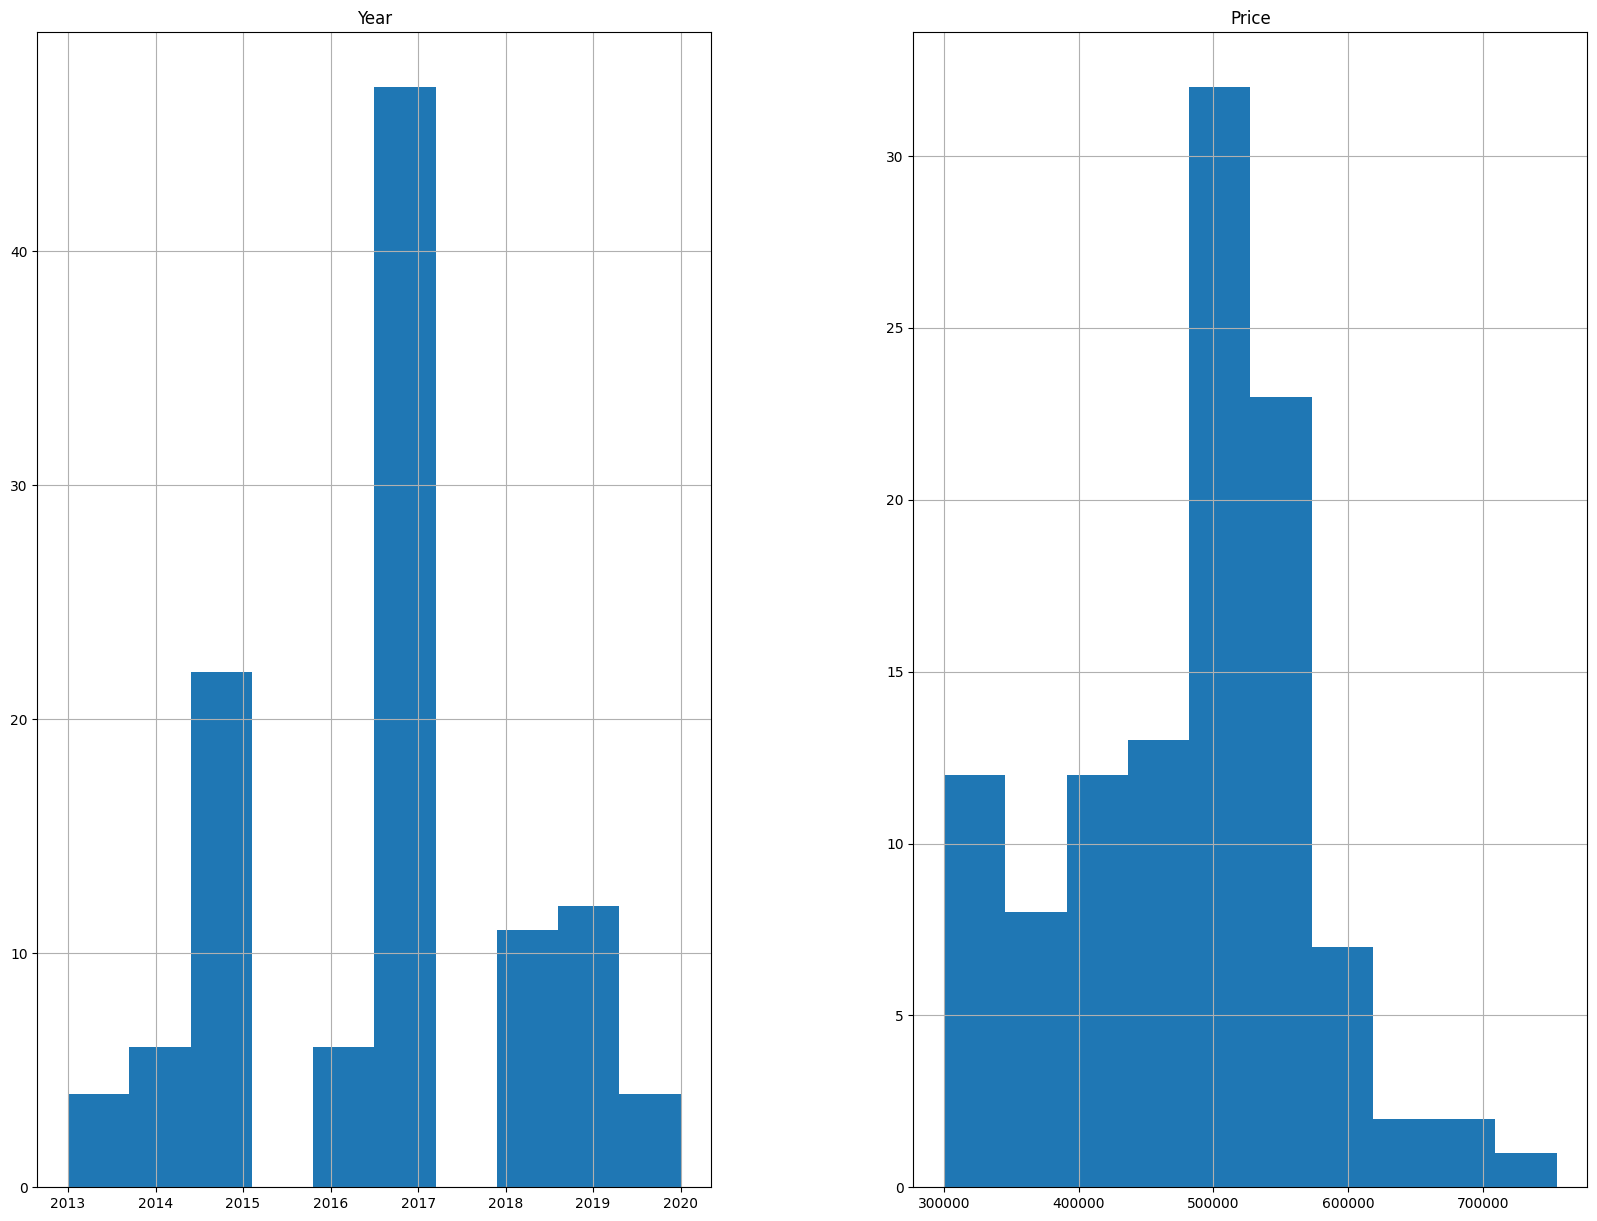

In [9]:
freqgraph=car.select_dtypes(include=['int'])
freqgraph.hist(figsize=(20,15))
plt.show

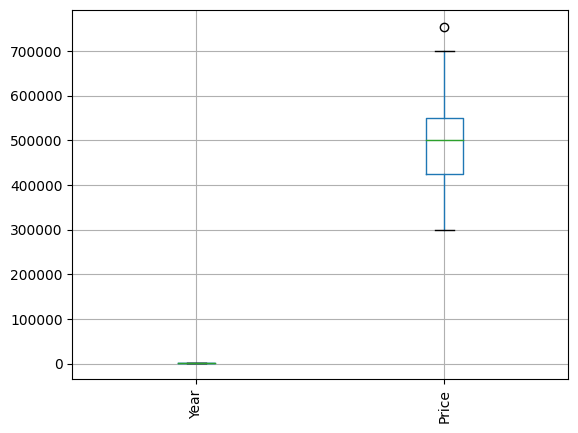

In [10]:
car.boxplot()
plt.xticks(rotation=90)
plt.show()

<Axes: >

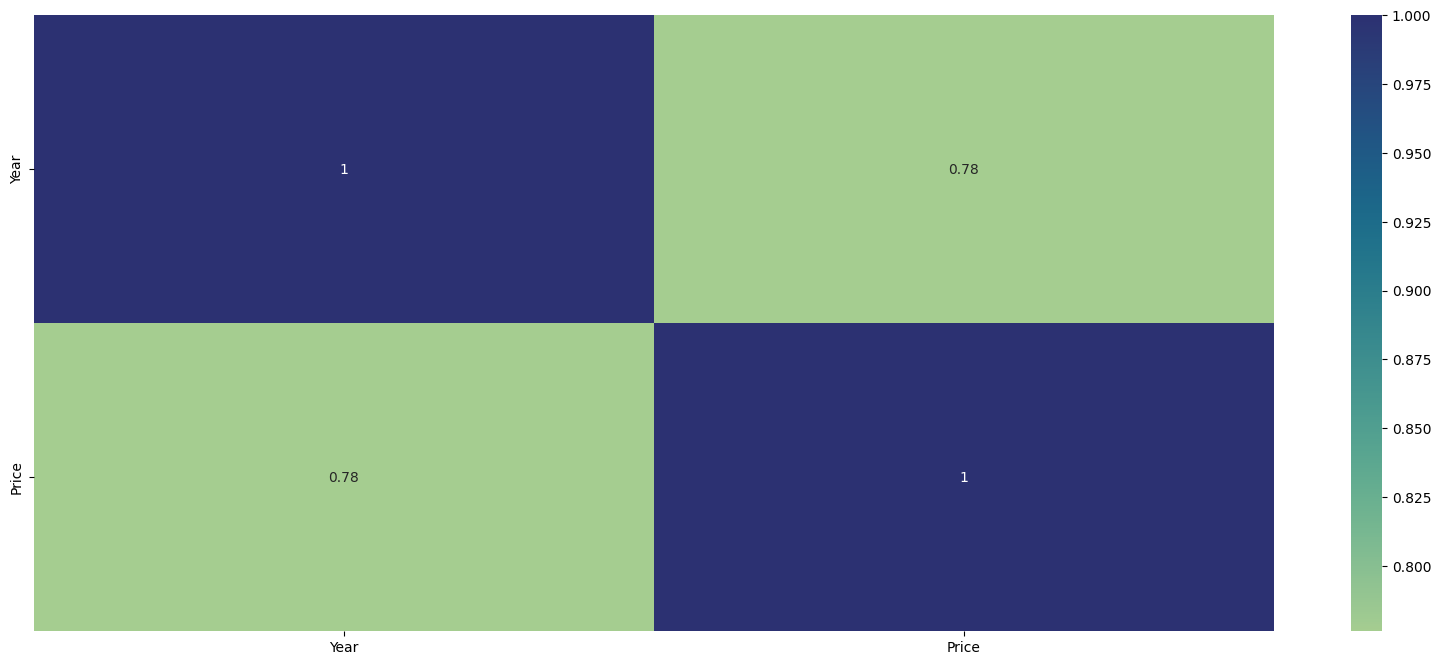

In [15]:
corrmat=car.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmat,annot=True,cmap='crest')


In [18]:
car.columns

Index(['Year', 'Price'], dtype='object')

In [19]:
y=car['Price']
x=car['Year']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)
x_train

81     2014
77     2015
15     2017
30     2019
45     2018
       ... 
106    2015
14     2017
92     2017
51     2018
102    2015
Name: Year, Length: 84, dtype: int64

In [23]:
from sklearn import linear_model
lr=linear_model.LinearRegression()


In [31]:
x_train.shape

(84,)

In [37]:
x_train_reshaped = x_train.values.reshape(-1, 1)
x_train_reshaped

array([[2014],
       [2015],
       [2017],
       [2019],
       [2018],
       [2017],
       [2017],
       [2014],
       [2015],
       [2017],
       [2015],
       [2015],
       [2016],
       [2015],
       [2020],
       [2017],
       [2017],
       [2014],
       [2017],
       [2016],
       [2017],
       [2019],
       [2015],
       [2020],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2018],
       [2019],
       [2015],
       [2017],
       [2018],
       [2017],
       [2018],
       [2015],
       [2016],
       [2015],
       [2017],
       [2017],
       [2017],
       [2013],
       [2015],
       [2019],
       [2015],
       [2017],
       [2014],
       [2015],
       [2019],
       [2014],
       [2016],
       [2017],
       [2017],
       [2017],
       [2017],
       [2014],
       [2016],
       [2017],
       [2017],
       [2017],
       [2017],
       [2020],
       [2019],
       [20

In [38]:
model=lr.fit(x_train_reshaped,y_train)

In [63]:
x_test_reshaped=x_test.values.reshape(-1,1)

In [66]:
predictions=model.predict(x_test_reshaped)
predictions

array([599223.07304104, 505265.04214995, 552244.05759549, 552244.05759549,
       552244.05759549, 411307.01125886, 505265.04214995, 552244.05759549,
       599223.07304104, 599223.07304104, 317348.98036776, 505265.04214995,
       411307.01125886, 646202.08848657, 552244.05759549, 599223.07304104,
       317348.98036776, 411307.01125886, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 411307.01125886, 411307.01125886])

In [41]:
y_test[40]

525000

In [46]:
predictions[0]


599223.0730410367

In [57]:
from sklearn.metrics import mean_squared_error,r2_score

mse=mean_squared_error(y_test,predictions)
mse

3878767151.073449

here the error value is large so machine dosen't learn anything

In [58]:
r_value=r2_score(y_test,predictions)
r_value

0.4347961632108023

here value is not close to one so the model is not good fit,model dosen't learn anything

# **Lasso Regression**

In [59]:
from sklearn.linear_model import Lasso
lo=Lasso()

In [60]:
model_ol=lo.fit(x_train_reshaped,y_train)


In [67]:
y_pred_lo=lo.predict(x_test_reshaped)

In [68]:
mean_squared_error(y_test,y_pred_lo)

3878735896.222091

In [69]:
r2_score(y_test,y_pred_lo)

0.4348007175862566

here both the models are not good fit